(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


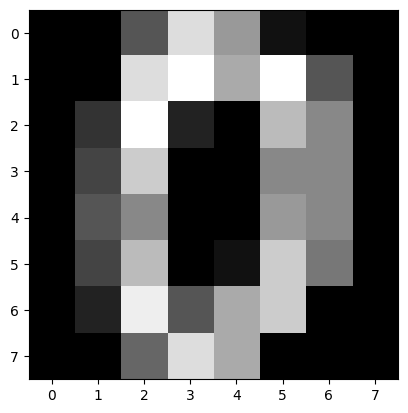

In [8]:
# test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# load data
digits = load_digits()
data = digits.data
data

print(data.shape)

# View the first img
print(digits.images[0])

# the first img num
print(digits.target[0])

# show the img
plt.gray()
plt.imshow(digits.images[0])
plt.show()


(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


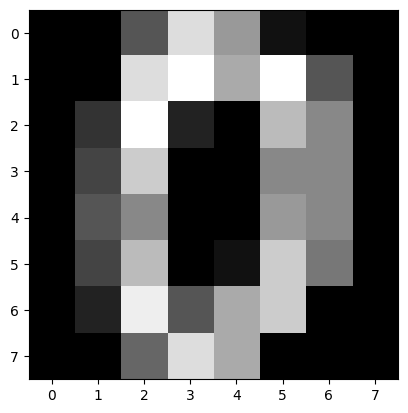

KNN accuracy score is: 0.9756
SVM accuracy score is: 0.9867
Naive Bayes accuracy score is: 0.8844
CART accuracy score is: 0.8422


In [16]:
# Analysis the digits data - use KNN
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# load data
digits = load_digits()
data = digits.data

# Explore the data
print(data.shape)

# view the first image
print(digits.images[0])

# The meaning of the numbers represented by the first image
print(digits.target[0])

# show the first image
plt.gray()
plt.imshow(digits.images[0])
plt.show()

# split the data, 25% use the test, other use train
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size = 0.25, random_state=33)

# use Z-score
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

# create KNN classifier
knn = KNeighborsClassifier()
knn.fit(train_ss_x, train_y)
predict_y = knn.predict(test_ss_x)
print('KNN accuracy score is: %.4lf' % accuracy_score(test_y, predict_y))


# create SVM classifier
svm = SVC()
svm.fit(train_ss_x, train_y)
predict_y = svm.predict(test_ss_x)
print('SVM accuracy score is: %.4lf' % accuracy_score(test_y, predict_y))

# use Min-Max
mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

# create Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y)
predict_y = mnb.predict(test_mm_x)
print('Naive Bayes accuracy score is: %.4lf' % accuracy_score(test_y, predict_y))

# create CART classifier
dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x, train_y)
predict_y = dtc.predict(test_mm_x)
print('CART accuracy score is: %.4lf' % accuracy_score(test_y, predict_y))
